In [ ]:
 import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# # Load the dataset
eda_data_df = pd.read_csv('/content/drive/MyDrive/COMS4995AML-Proj/code/Project/data/eda_data.csv')
glassdoor_jobs_df = pd.read_csv('/content/drive/MyDrive/COMS4995AML-Proj/code/Project/data/glassdoor_jobs.csv')
salary_data_cleaned_df = pd.read_csv('/content/drive/MyDrive/COMS4995AML-Proj/code/Project/data/salary_data_cleaned.csv')

# salary_data_cleaned_df = pd.read_csv('salary_data_cleaned.csv')

# Cleaning and Preprocessing

In [ ]:
salary = salary_data_cleaned_df

In [ ]:
job_description = salary[['Job Description', 'avg_salary']]
job_description

,Job Description,avg_salary
0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",72.0
1,What You Will Do:\n\nI. General Summary\n\nThe...,87.5
2,"KnowBe4, Inc. is a high growth information sec...",85.0
3,*Organization and Job ID**\nJob ID: 310709\n\n...,76.5
4,Data Scientist\nAffinity Solutions / Marketing...,114.5
...,...,...
737,Site Name: USA - Massachusetts - Cambridge\nPo...,84.5
738,THE CHALLENGE\nEventbrite has a world-class da...,102.5
739,The Auton Lab at Carnegie Mellon University is...,73.5
740,Data Science ManagerResponsibilities:\n\nOvers...,127.5


In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk, re
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt')

stemmer = PorterStemmer()
words = stopwords.words("english")
#job_description['cleaned']
salary['Cleaned Job Description'] = job_description['Job Description']\
.apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
final_features = vectorizer.fit_transform(salary['Cleaned Job Description']).toarray()
final_features.shape

(742, 28688)

In [ ]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Job Title                742 non-null    object 
 1   Salary Estimate          742 non-null    object 
 2   Job Description          742 non-null    object 
 3   Rating                   742 non-null    float64
 4   Company Name             742 non-null    object 
 5   Location                 742 non-null    object 
 6   Headquarters             742 non-null    object 
 7   Size                     742 non-null    object 
 8   Founded                  742 non-null    int64  
 9   Type of ownership        742 non-null    object 
 10  Industry                 742 non-null    object 
 11  Sector                   742 non-null    object 
 12  Revenue                  742 non-null    object 
 13  Competitors              742 non-null    object 
 14  hourly                   7

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression


In [ ]:
# Separate the features and the target variable
X = salary.drop(columns=['avg_salary'])
y = salary['avg_salary']

In [ ]:
# Drop repeated features
X = X.drop(columns=['Salary Estimate', 'Job Description', 'company_txt'])

In [ ]:
! pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 3.4 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce
# Define the categorical columns that need to be one-hot encoded
cat_cols = ['job_state','Headquarters','Location','Size', 'Job Title', 'Company Name', 
            'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors', 'Cleaned Job Description']
te = ce.TargetEncoder (cols = cat_cols)
te.fit(X , y)
df_encoded = te.transform(X)

In [ ]:
df_encoded.head()

,Job Title,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,...,max_salary,job_state,same_state,age,python_yn,R_yn,spark,aws,excel,Cleaned Job Description
0,106.179305,3.8,96.901524,96.564705,96.901524,90.753842,1973,101.776829,99.651233,99.651233,...,91,96.564705,0,47,1,0,0,0,1,96.901524
1,98.918206,3.4,98.918206,98.918206,97.782204,112.230575,1984,97.053845,69.343702,69.343702,...,112,97.953468,0,36,1,0,0,0,0,98.918206
2,106.179305,4.8,95.985349,95.985349,95.985349,90.753842,2010,101.776829,99.099869,97.702355,...,90,91.395421,1,10,1,0,1,0,1,98.409445
3,106.179305,3.8,96.974859,94.177868,95.381099,92.916684,1965,94.462278,93.481831,93.481831,...,97,96.722510,1,55,1,0,0,0,0,97.203710
4,106.179305,2.9,102.717572,103.062780,100.403309,111.344512,1998,101.776829,102.912920,97.702355,...,143,98.663604,1,22,1,0,0,0,1,102.431134


<Axes: >

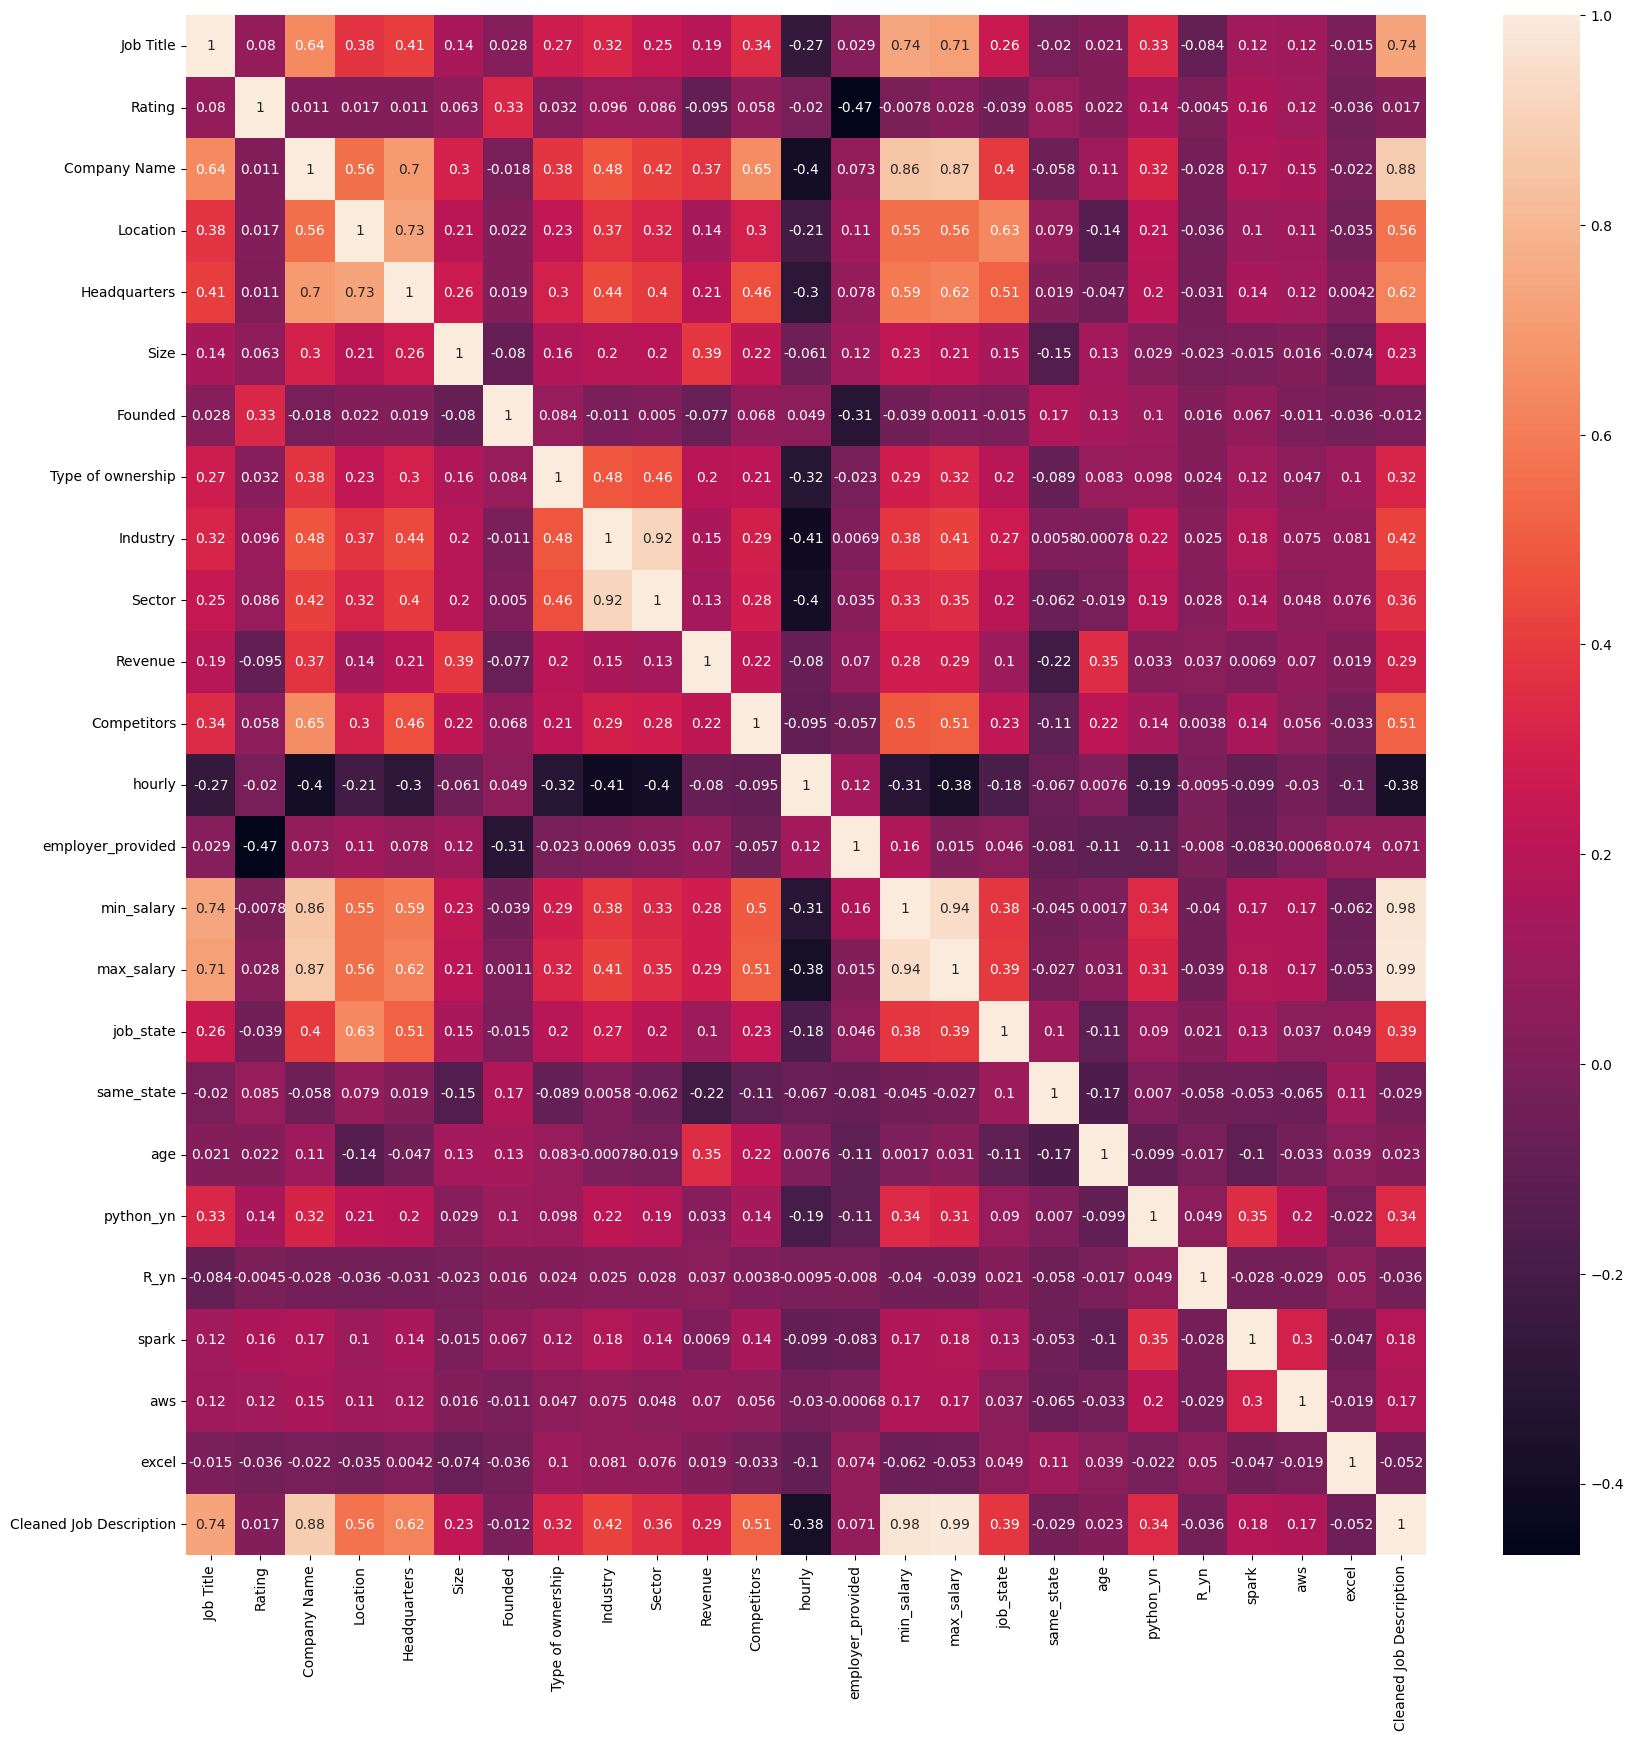

In [ ]:
# Check correlation between features
correlation = df_encoded.corr() 
plt.figure(figsize=(20, 20)) 
sns.heatmap(correlation, annot=True)

In [ ]:
# drop highly correlated features (>=0.9): 
# Industry & Sector, min_salary & max_salary, Cleaned Job Description & min_salary, Cleaned Job Description & max_salary
df_encoded = df_encoded.drop(columns=['Industry', 'max_salary', 'min_salary'])

In [ ]:
combined_df = df_encoded
combined_df

,Job Title,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Sector,Revenue,...,employer_provided,job_state,same_state,age,python_yn,R_yn,spark,aws,excel,Cleaned Job Description
0,106.179305,3.8,96.901524,96.564705,96.901524,90.753842,1973,101.776829,99.651233,100.569421,...,0,96.564705,0,47,1,0,0,0,1,96.901524
1,98.918206,3.4,98.918206,98.918206,97.782204,112.230575,1984,97.053845,69.343702,95.497790,...,0,97.953468,0,36,1,0,0,0,0,98.918206
2,106.179305,4.8,95.985349,95.985349,95.985349,90.753842,2010,101.776829,97.702355,83.168251,...,0,91.395421,1,10,1,0,1,0,1,98.409445
3,106.179305,3.8,96.974859,94.177868,95.381099,92.916684,1965,94.462278,93.481831,87.320195,...,0,96.722510,1,55,1,0,0,0,0,97.203710
4,106.179305,2.9,102.717572,103.062780,100.403309,111.344512,1998,101.776829,97.702355,104.310345,...,0,98.663604,1,22,1,0,0,0,1,102.431134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,98.338519,3.9,98.421082,108.183579,98.421082,112.230575,1830,110.893782,111.766731,115.164880,...,0,106.280148,0,190,0,0,0,1,0,98.338519
738,108.174439,4.4,100.168895,93.944492,123.243870,92.916684,2006,110.893782,113.191665,83.168251,...,0,96.143020,0,14,1,0,1,1,0,100.891838
739,96.435984,2.6,102.757466,102.653781,102.757466,90.753842,1984,102.945170,100.690992,104.310345,...,0,94.287934,1,36,0,0,0,0,1,96.435984
740,109.617020,3.2,104.545779,104.438115,104.545779,101.886778,-1,101.776829,97.702355,112.098537,...,0,94.287934,0,-1,0,0,0,0,1,104.438115


# Linear Regression

In [ ]:
X = combined_df
y = salary['avg_salary']

Train Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import pandas as pd

# Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split the training set into training and validation sets (70-30 split)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Create a linear regression object
regressor = LinearRegression()

# Define the hyperparameters to search through
hyperparameters = {'fit_intercept': [True, False]}

# Create a grid search object with the defined hyperparameters
linear_grid_search = GridSearchCV(regressor, hyperparameters, cv=5)
# Create a random search object with the defined hyperparameters
linear_random_search = RandomizedSearchCV(regressor, hyperparameters, cv=5)

# Fit the grid search object to the training data
linear_grid_search.fit(X_train, y_train)
# Fit the random search object to the training data
linear_random_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LinearRegression(),
                   param_distributions={'fit_intercept': [True, False]})

Evaluate Model

Best Hyperparameters 
----------------------
Best hyperparameters Grid search: {'fit_intercept': True}
Best hyperparameters Random search: {'fit_intercept': True}

Validation set MSE/R^2
----------------------
Grid Search MSE: 6.74
Grid Search R2: 1.00
Random Search MSE: 6.74
Random Search R2: 1.00

Test set MSE/R^2
----------------------
Grid Search MSE: 9.74
Grid Search R2: 0.99
Random Search MSE: 9.74
Random Search R2: 0.99



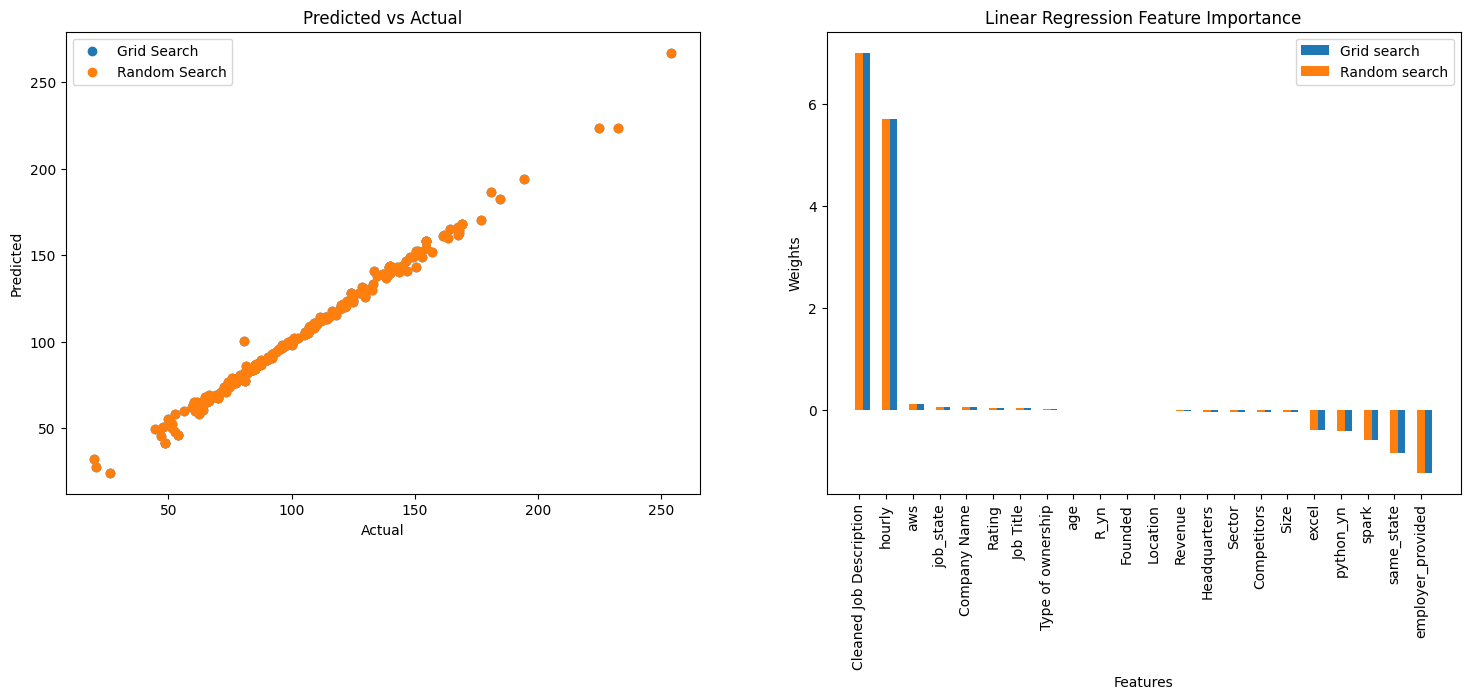

In [ ]:
# Print the best set of hyperparameters
print("Best Hyperparameters ")
print("----------------------")
print("Best hyperparameters Grid search:",linear_grid_search.best_params_)
print("Best hyperparameters Random search:",linear_random_search.best_params_)
print()

# Evaluate the model on the validation set
grid_y_val_pred = linear_grid_search.best_estimator_.predict(X_val)
random_y_val_pred = linear_random_search.best_estimator_.predict(X_val)

print("Validation set MSE/R^2")
print("----------------------")
print("Grid Search MSE: {:.2f}".format(mean_squared_error(y_val, grid_y_val_pred)))
print("Grid Search R2: {:.2f}".format(r2_score(y_val, grid_y_val_pred)))
print("Random Search MSE: {:.2f}".format(mean_squared_error(y_val, random_y_val_pred)))
print("Random Search R2: {:.2f}".format(r2_score(y_val, random_y_val_pred)))
print()

# Predict the output values for new input data using the best model
linear_grid_y_test_pred = linear_grid_search.predict(X_test)
linear_random_y_test_pred = linear_random_search.predict(X_test)

# mse and r2 metrics
linear_grid_test_mse = mean_squared_error(y_test, linear_grid_y_test_pred)
linear_grid_test_r2 = r2_score(y_test, linear_grid_y_test_pred)
linear__random_test_mse = mean_squared_error(y_test, linear_random_y_test_pred)
linear_random_test_r2 = r2_score(y_test, linear_random_y_test_pred)

print("Test set MSE/R^2")
print("----------------------")
print("Grid Search MSE: {:.2f}".format(linear_grid_test_mse))
print("Grid Search R2: {:.2f}".format(linear_grid_test_r2))
print("Random Search MSE: {:.2f}".format(linear__random_test_mse))
print("Random Search R2: {:.2f}".format(linear_random_test_r2))
print()

figure, axis = plt.subplots(1, 2,figsize=(18, 6))
axis[0].scatter(y_test, linear_grid_y_test_pred, label = "Grid Search")
axis[0].scatter(y_test, linear_random_y_test_pred, label = "Random Search")
axis[0].set_xlabel("Actual")
axis[0].set_ylabel("Predicted")
axis[0].set_title("Predicted vs Actual") 
axis[0].legend()

# Feature importance
grid_feature_importaces = {"labels":linear_grid_search.best_estimator_.feature_names_in_,"scores":linear_grid_search.best_estimator_.coef_}
random_feature_importaces = {"labels":linear_random_search.best_estimator_.feature_names_in_,"scores":linear_random_search.best_estimator_.coef_}

grid_feature_importaces = pd.DataFrame(grid_feature_importaces).sort_values("scores",ascending=False)
random_feature_importaces = pd.DataFrame(random_feature_importaces).sort_values("scores",ascending=False)

axis[1].bar("labels","scores",data=grid_feature_importaces,width=0.4,label="Grid search",align="edge") 
axis[1].bar("labels","scores",data=random_feature_importaces,width=0.3,label="Random search") 
axis[1].set_xlabel("Features")
axis[1].set_ylabel("Weights")
axis[1].set_title("Linear Regression Feature Importance") 
axis[1].legend()
plt.xticks(rotation = 90)
plt.show()

# RandomForestRegressor

In [ ]:
X = combined_df
y = salary['avg_salary']

grid search and grid search results

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
import random

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for the random forest model
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, 100],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

random_grid = {
    "max_depth": [10, 20, None], 
    "max_features": sp_randint(1, 11), 
    "min_samples_split": sp_randint(2, 11), 
    "bootstrap": [True, False], 
    "min_samples_leaf": [1, 2, 4]
    
}

# Create a grid search object
RandomForestRegressor = RandomForestRegressor(random_state=42)
randforest_grid_search = GridSearchCV(RandomForestRegressor, param_grid, cv=5, scoring="neg_mean_squared_error")
randforest_random_search = RandomizedSearchCV(RandomForestRegressor, random_grid, cv=5, scoring="neg_mean_squared_error")
# Fit the grid search object on the training data
randforest_grid_search.fit(X_train, y_train)
randforest_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe548d7cc40>,
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe54943e500>},
                   scoring='neg_mean_squared_error')

random search and rm results

Best Hyperparameters 
----------------------
Best hyperparameters Grid search: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best hyperparameters Random search: {'bootstrap': False, 'max_depth': 20, 'max_features': 8, 'min_samples_leaf': 1, 'min_samples_split': 5}

Validation set MSE/R^2
----------------------
Grid Search MSE: 1.30
Grid Search R2: 1.00
Random Search MSE: 1.74
Random Search R2: 1.00

Test set MSE/R^2
----------------------
Grid Search MSE: 5.11
Grid Search R2: 1.00
Random Search MSE: 8.89
Random Search R2: 0.99



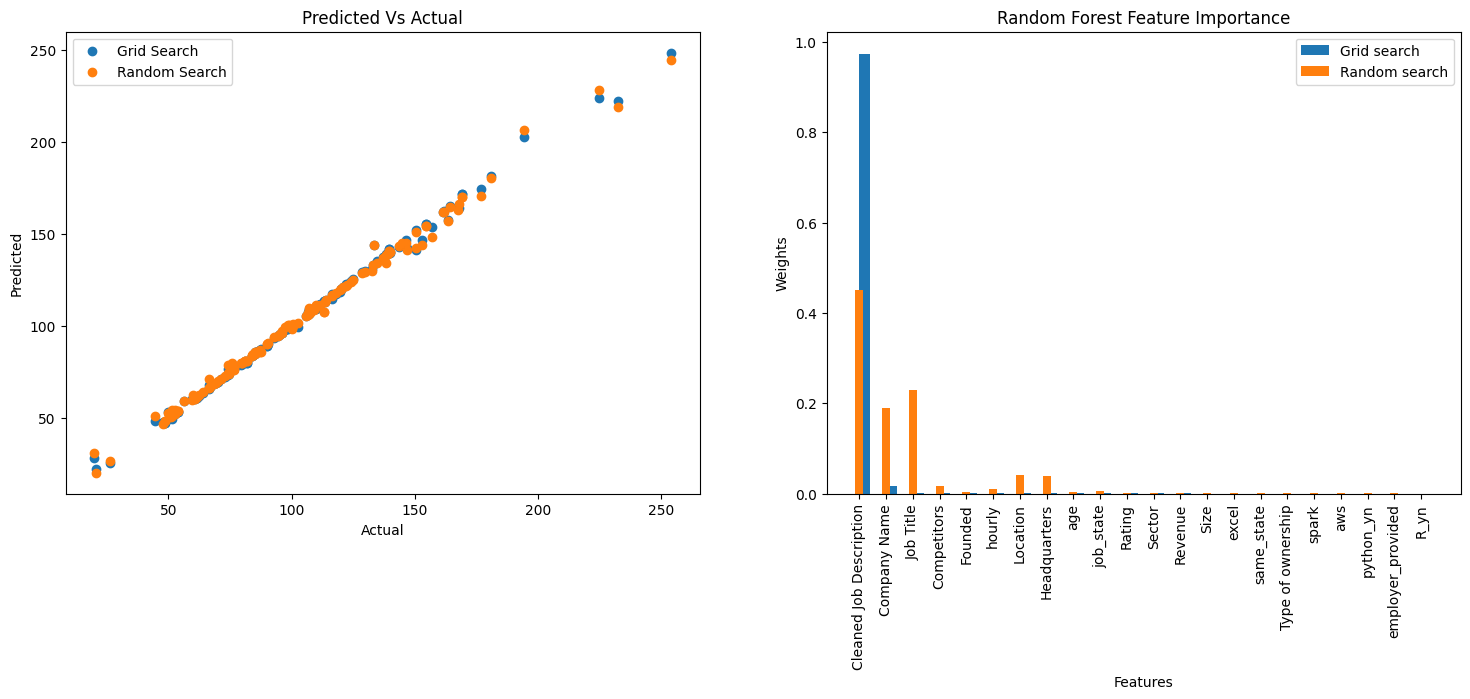

In [ ]:
# Print the best set of hyperparameters
print("Best Hyperparameters ")
print("----------------------")
print("Best hyperparameters Grid search:",randforest_grid_search.best_params_)
print("Best hyperparameters Random search:",randforest_random_search.best_params_)
print()

# Evaluate the model on the validation set
grid_y_val_pred = randforest_grid_search.best_estimator_.predict(X_val)
random_y_val_pred = randforest_random_search.best_estimator_.predict(X_val)

print("Validation set MSE/R^2")
print("----------------------")
print("Grid Search MSE: {:.2f}".format(mean_squared_error(y_val, grid_y_val_pred)))
print("Grid Search R2: {:.2f}".format(r2_score(y_val, grid_y_val_pred)))
print("Random Search MSE: {:.2f}".format(mean_squared_error(y_val, random_y_val_pred)))
print("Random Search R2: {:.2f}".format(r2_score(y_val, random_y_val_pred)))
print()

# Predict the output values for new input data using the best model
randforest_grid_y_val_pred = randforest_grid_search.predict(X_test)
randforest_random_y_val_pred = randforest_random_search.predict(X_test)

# mse and r2 metrics
randforest_grid_test_mse = mean_squared_error(y_test, randforest_grid_y_val_pred)
randforest_grid_test_r2 = r2_score(y_test, randforest_grid_y_val_pred)
randforest__random_test_mse = mean_squared_error(y_test, randforest_random_y_val_pred)
randforest_random_test_r2 = r2_score(y_test, randforest_random_y_val_pred)

print("Test set MSE/R^2")
print("----------------------")
print("Grid Search MSE: {:.2f}".format(randforest_grid_test_mse))
print("Grid Search R2: {:.2f}".format(randforest_grid_test_r2))
print("Random Search MSE: {:.2f}".format(randforest__random_test_mse))
print("Random Search R2: {:.2f}".format(randforest_random_test_r2))
print()

X_labels = X.columns.tolist()
X_axis = np.arange(len(X_labels))
figure, axis = plt.subplots(1, 2,figsize=(18, 6))

axis[0].scatter(y_test, randforest_grid_y_val_pred, label = "Grid Search")
axis[0].scatter(y_test, randforest_random_y_val_pred, label = "Random Search")
axis[0].set_xlabel("Actual")
axis[0].set_ylabel("Predicted")
axis[0].set_title("Predicted Vs Actual") 
axis[0].legend()

# Feature importance
grid_feature_importaces = {"labels":randforest_grid_search.best_estimator_.feature_names_in_,"scores":randforest_grid_search.best_estimator_.feature_importances_}
random_feature_importaces = {"labels":randforest_random_search.best_estimator_.feature_names_in_,"scores":randforest_random_search.best_estimator_.feature_importances_}

grid_feature_importaces = pd.DataFrame(grid_feature_importaces).sort_values("scores",ascending=False)
random_feature_importaces = pd.DataFrame(random_feature_importaces).sort_values("scores",ascending=False)

axis[1].bar("labels","scores",data=grid_feature_importaces,width=0.4,label="Grid search",align="edge") 
axis[1].bar("labels","scores",data=random_feature_importaces,width=0.3,label="Random search") 
axis[1].set_xlabel("Features")
axis[1].set_ylabel("Weights")
axis[1].set_title("Random Forest Feature Importance") 
axis[1].legend()
plt.xticks(rotation = 90)
plt.show()

#Bayesian Linear Regression

Train Model

In [ ]:
X = combined_df
y = salary['avg_salary'] 

In [ ]:
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform
import random

# Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split the training set into training and validation sets (70-30 split)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Define the parameter grid for the grid search
param_grid = {'n_iter': [100, 500, 1000],
              'alpha_1': [1e-6, 1e-5, 1e-4],
              'alpha_2': [1e-6, 1e-5, 1e-4],
              'lambda_1': [1e-6, 1e-5, 1e-4],
              'lambda_2': [1e-6, 1e-5, 1e-4]}

# Define the parameter grid for the grid search
rand_param_grid = {'n_iter': np.random.randint(40, 600,20),
                  'alpha_1': np.random.uniform(1e-10, 1e-5,20),
                  'alpha_2': np.random.uniform(1e-10, 1e-5,20),
                  'lambda_1': np.random.uniform(1e-10, 1e-5,20),
                  'lambda_2': np.random.uniform(1e-10, 1e-5,20)}

# Fit a Bayesian Linear Regression model
bayes_linear_reg = BayesianRidge()
bayes_grid_search = GridSearchCV(BayesianRidge(), param_grid, cv=5, scoring='neg_mean_squared_error')
bayes_random_search = RandomizedSearchCV(bayes_linear_reg,rand_param_grid, random_state=10)
bayes_grid_search.fit(X_train, y_train)
bayes_random_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=BayesianRidge(),
                   param_distributions={'alpha_1': array([2.96069344e-06, 8.02756459e-07, 1.85397873e-06, 2.60040755e-06,
       1.77751665e-06, 2.81582683e-06, 5.59571169e-06, 2.14708110e-07,
       8.07427538e-06, 3.80048485e-06, 7.77246612e-06, 8.43048407e-06,
       9.45106500e-06, 7.57728371e-06, 1.34149720e-06, 4.77762257e-06,
       4.07156483e-06, 7.46455671e-...
       8.93767932e-06, 6.81569933e-06, 8.20369853e-07, 7.65681594e-07,
       4.37552122e-06, 3.04157655e-06, 8.00734204e-06, 1.28378705e-06,
       9.95063252e-06, 1.61640144e-06, 7.21038169e-06, 9.80714018e-06,
       5.85835220e-06, 3.61865229e-06, 3.29759558e-06, 8.19517378e-07]),
                                        'n_iter': array([422, 453, 171,  45, 340, 167, 342, 189, 257, 214, 501, 207, 212,
       252, 435,  64, 101, 513, 277, 392])},
                   random_state=10)

Evaluate Model

Best Hyperparameters 
----------------------
Best hyperparameters Grid search: {'alpha_1': 1e-06, 'alpha_2': 0.0001, 'lambda_1': 0.0001, 'lambda_2': 1e-06, 'n_iter': 100}
Best hyperparameters Random search: {'n_iter': 392, 'lambda_2': 4.375521221949069e-06, 'lambda_1': 9.76970822194802e-06, 'alpha_2': 7.03226164150634e-06, 'alpha_1': 5.595711693274946e-06}

Validation set MSE/R^2
----------------------
Grid Search MSE: 6.61
Grid Search R2: 1.00
Random Search MSE: 6.61
Random Search R2: 1.00

Test set MSE/R^2
----------------------
Grid Search MSE: 9.66
Grid Search R2: 0.99
Random Search MSE: 9.66
Random Search R2: 0.99



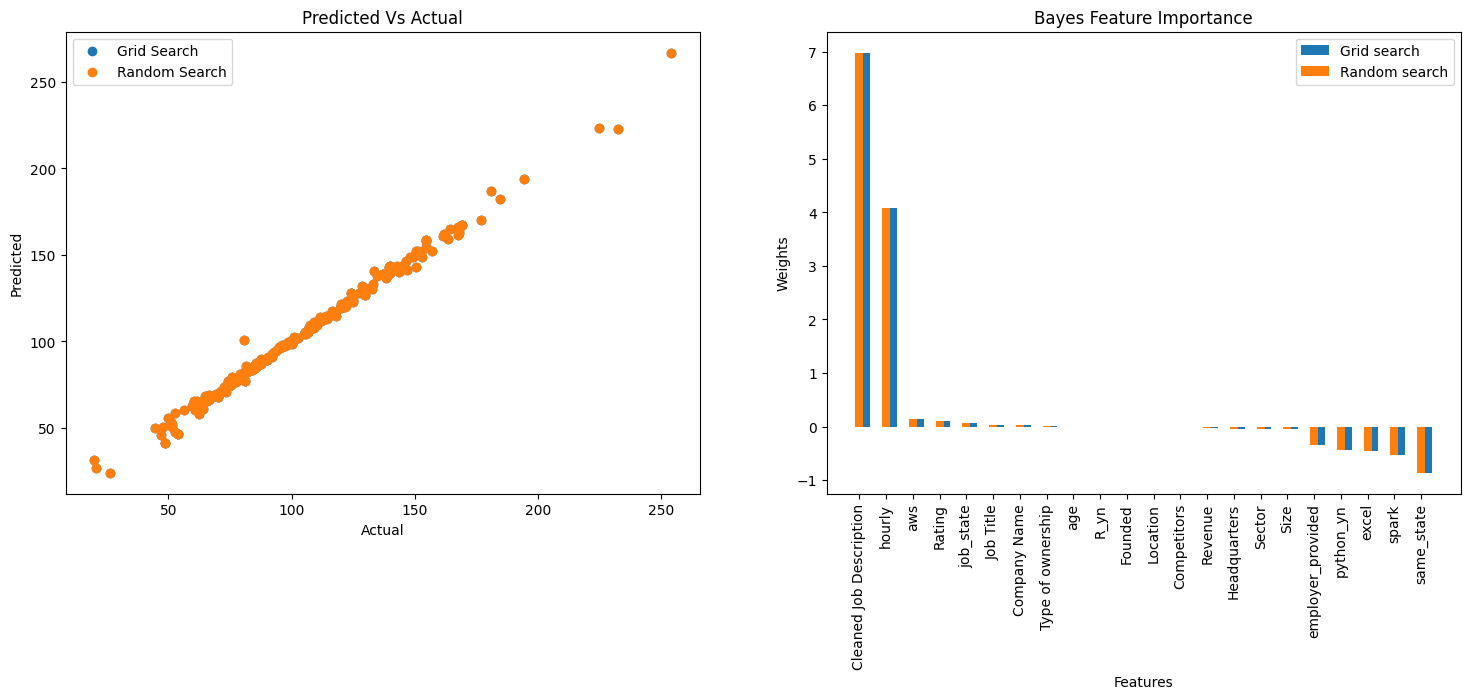

In [ ]:
# Print the best set of hyperparameters
print("Best Hyperparameters ")
print("----------------------")
print("Best hyperparameters Grid search:",bayes_grid_search.best_params_)
print("Best hyperparameters Random search:",bayes_random_search.best_params_)
print()

# Evaluate the model on the validation set
grid_y_val_pred = bayes_grid_search.best_estimator_.predict(X_val)
random_y_val_pred = bayes_random_search.best_estimator_.predict(X_val)

print("Validation set MSE/R^2")
print("----------------------")
print("Grid Search MSE: {:.2f}".format(mean_squared_error(y_val, grid_y_val_pred)))
print("Grid Search R2: {:.2f}".format(r2_score(y_val, grid_y_val_pred)))
print("Random Search MSE: {:.2f}".format(mean_squared_error(y_val, random_y_val_pred)))
print("Random Search R2: {:.2f}".format(r2_score(y_val, random_y_val_pred)))
print()

# Predict the output values for new input data using the best model
bayes_grid_y_val_pred = bayes_grid_search.predict(X_test)
bayes_random_y_val_pred = bayes_random_search.predict(X_test)

# mse and r2 metrics
bayes_grid_test_mse = mean_squared_error(y_test, bayes_grid_y_val_pred)
bayes_grid_test_r2 = r2_score(y_test, bayes_grid_y_val_pred)
bayes__random_test_mse = mean_squared_error(y_test, bayes_random_y_val_pred)
bayes_random_test_r2 = r2_score(y_test, bayes_random_y_val_pred)

print("Test set MSE/R^2")
print("----------------------")
print("Grid Search MSE: {:.2f}".format(bayes_grid_test_mse))
print("Grid Search R2: {:.2f}".format(bayes_grid_test_r2))
print("Random Search MSE: {:.2f}".format(bayes__random_test_mse))
print("Random Search R2: {:.2f}".format(bayes_random_test_r2))
print()

X_labels = X.columns.tolist()
X_axis = np.arange(len(X_labels))
figure, axis = plt.subplots(1, 2,figsize=(18, 6))

axis[0].scatter(y_test, bayes_grid_y_val_pred, label = "Grid Search")
axis[0].scatter(y_test, bayes_random_y_val_pred, label = "Random Search")
axis[0].set_xlabel("Actual")
axis[0].set_ylabel("Predicted")
axis[0].set_title("Predicted Vs Actual") 
axis[0].legend()

# Feature importance
grid_feature_importaces = {"labels":bayes_grid_search.best_estimator_.feature_names_in_,"scores":bayes_grid_search.best_estimator_.coef_}
random_feature_importaces = {"labels":bayes_random_search.best_estimator_.feature_names_in_,"scores":bayes_random_search.best_estimator_.coef_}

grid_feature_importaces = pd.DataFrame(grid_feature_importaces).sort_values("scores",ascending=False)
random_feature_importaces = pd.DataFrame(random_feature_importaces).sort_values("scores",ascending=False)

axis[1].bar("labels","scores",data=grid_feature_importaces,width=0.4,label="Grid search",align="edge") 
axis[1].bar("labels","scores",data=random_feature_importaces,width=0.3,label="Random search") 
axis[1].set_xlabel("Features")
axis[1].set_ylabel("Weights")
axis[1].set_title("Bayes Feature Importance") 
axis[1].legend()
plt.xticks(rotation = 90)
plt.show()

#Polynomial Regression

Train Model

In [ ]:
X = combined_df
y = salary['avg_salary']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# pipeline for polynomial regression
poly = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('lin_reg', LinearRegression())
])

# hyperparameters for the grid search
param_grid = {
    'poly_features__degree': [2, 3, 4],
    'lin_reg__fit_intercept': [True, False]
}

# hyperparameters for the random search
rand_param_grid = {'poly_features__degree': np.random.randint(1, 6,10)}

# grid search
poly_grid_search = GridSearchCV(poly, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# random search
poly_random_search = RandomizedSearchCV(poly, rand_param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search object to the training data
poly_grid_search.fit(X_train, y_train)
# Fit the random search object to the training data
poly_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('poly_features',
                                              PolynomialFeatures()),
                                             ('lin_reg', LinearRegression())]),
                   param_distributions={'poly_features__degree': array([2, 4, 4, 5, 2, 5, 4, 2, 5, 5])},
                   scoring='neg_mean_squared_error')

Evaluate Model

Best Hyperparameters 
----------------------
Best hyperparameters Grid search: {'lin_reg__fit_intercept': False, 'poly_features__degree': 2}
Best hyperparameters Random search: {'poly_features__degree': 5}

Validation set MSE/R^2
----------------------
Grid Search MSE: 13.25
Grid Search R2: 0.99
Random Search MSE: 556.88
Random Search R2: 0.66

Test set MSE/R^2
----------------------
Grid Search MSE: 10.44
Grid Search R2: 0.99
Random Search MSE: 372.09
Random Search R2: 0.74



<ipython-input-39-a7b6a915cd40>:64: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[1].set_xticklabels(labels=axis[1].get_xticklabels(),rotation=90)


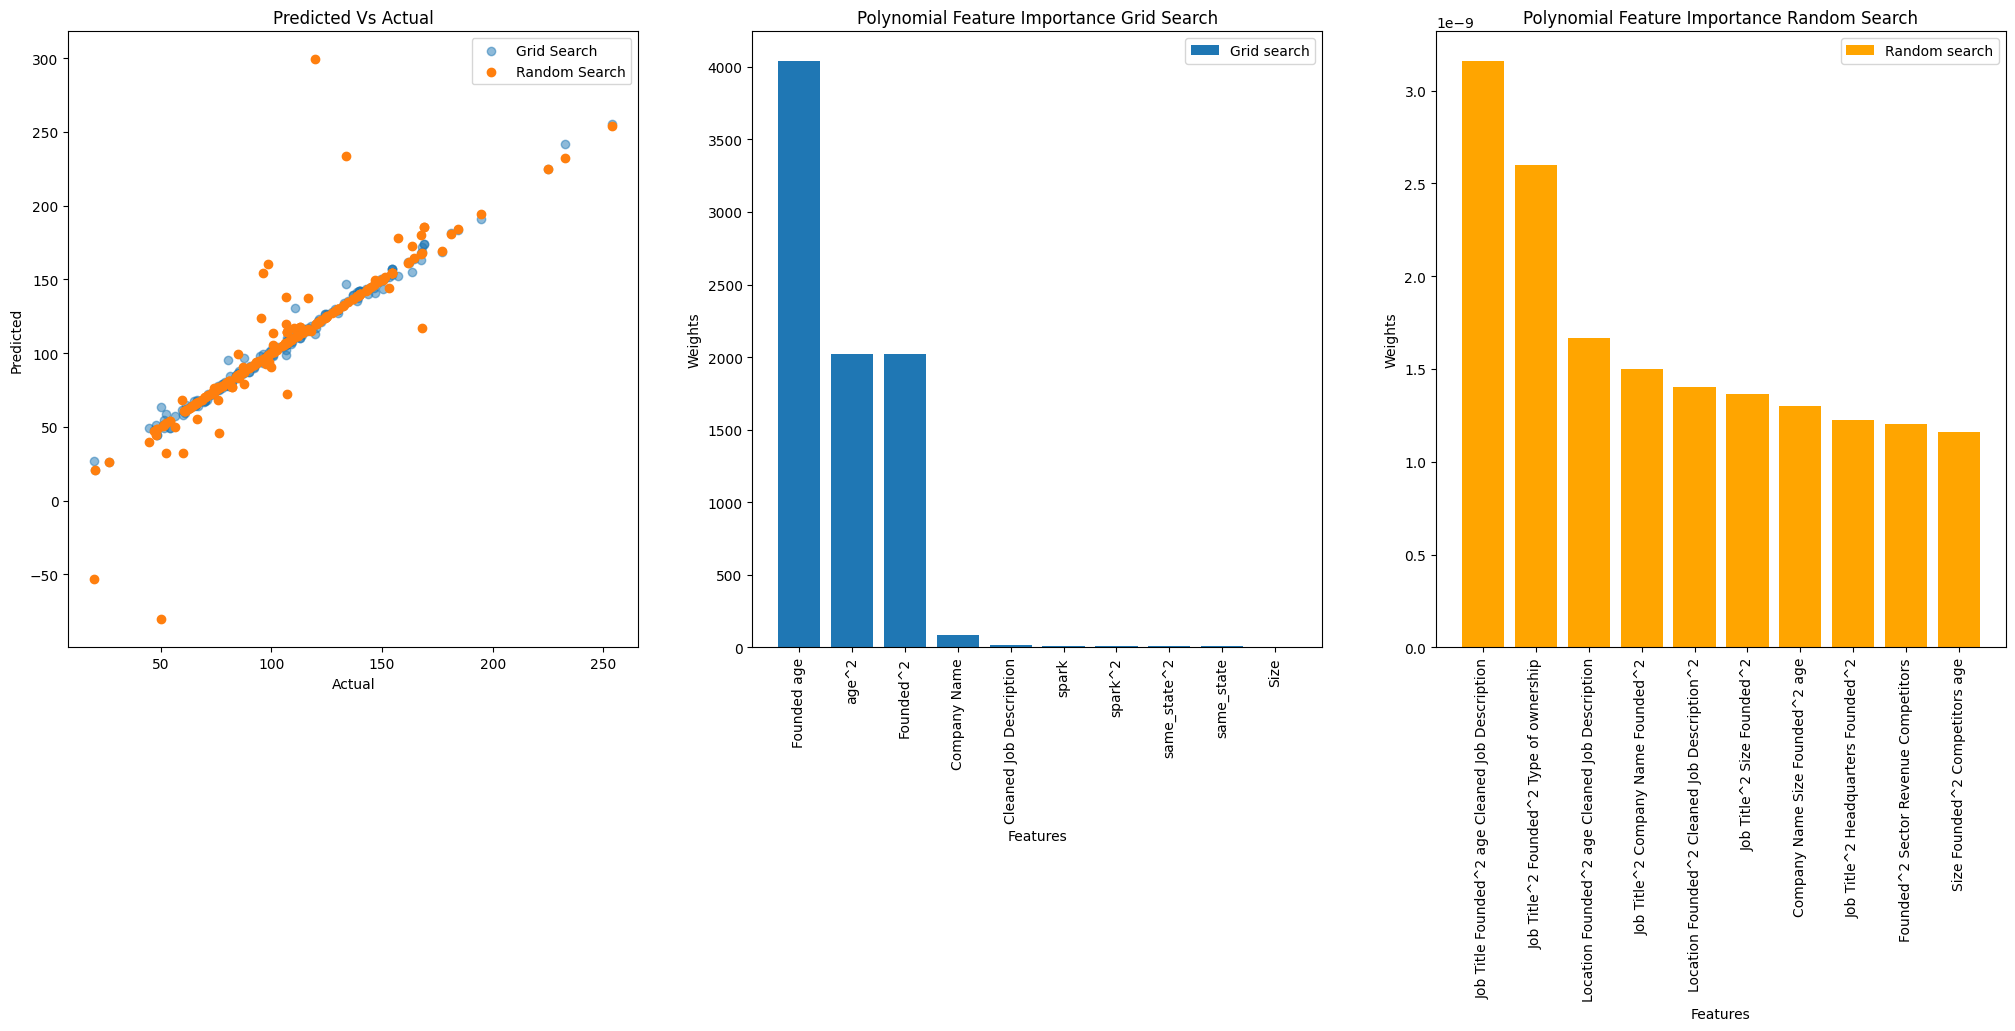

In [ ]:
# Print the best set of hyperparameters
print("Best Hyperparameters ")
print("----------------------")
print("Best hyperparameters Grid search:",poly_grid_search.best_params_)
print("Best hyperparameters Random search:",poly_random_search.best_params_)
print()

# Evaluate the model on the validation set
grid_y_val_pred = poly_grid_search.best_estimator_.predict(X_val)
random_y_val_pred = poly_random_search.best_estimator_.predict(X_val)

print("Validation set MSE/R^2")
print("----------------------")
print("Grid Search MSE: {:.2f}".format(mean_squared_error(y_val, grid_y_val_pred)))
print("Grid Search R2: {:.2f}".format(r2_score(y_val, grid_y_val_pred)))
print("Random Search MSE: {:.2f}".format(mean_squared_error(y_val, random_y_val_pred)))
print("Random Search R2: {:.2f}".format(r2_score(y_val, random_y_val_pred)))
print()

# Predict the output values for new input data using the best model
poly_grid_y_val_pred = poly_grid_search.predict(X_test)
poly_random_y_val_pred = poly_random_search.predict(X_test)

# mse and r2 metrics
poly_grid_test_mse = mean_squared_error(y_test, poly_grid_y_val_pred)
poly_grid_test_r2 = r2_score(y_test, poly_grid_y_val_pred)
poly__random_test_mse = mean_squared_error(y_test, poly_random_y_val_pred)
poly_random_test_r2 = r2_score(y_test, poly_random_y_val_pred)

print("Test set MSE/R^2")
print("----------------------")
print("Grid Search MSE: {:.2f}".format(poly_grid_test_mse))
print("Grid Search R2: {:.2f}".format(poly_grid_test_r2))
print("Random Search MSE: {:.2f}".format(poly__random_test_mse))
print("Random Search R2: {:.2f}".format(poly_random_test_r2))
print()


# Feature importance
figure, axis = plt.subplots(1, 3,figsize=(25, 8))

axis[0].scatter(y_test, poly_grid_y_val_pred, label = "Grid Search",alpha=0.5)
axis[0].scatter(y_test, poly_random_y_val_pred, label = "Random Search")
axis[0].set_xlabel("Actual")
axis[0].set_ylabel("Predicted")
axis[0].set_title("Predicted Vs Actual") 
axis[0].legend()

# Get the names of the polynomial features
grid_poly_feat_names = poly_grid_search.best_estimator_.named_steps['poly_features'].get_feature_names_out(X.columns)
rand_poly_feat_names = poly_random_search.best_estimator_.named_steps['poly_features'].get_feature_names_out(X.columns)

# Get the feature importance
poly_grid_coef = poly_grid_search.best_estimator_.named_steps['lin_reg'].coef_
poly_random_coef = poly_random_search.best_estimator_.named_steps['lin_reg'].coef_

grid_feature_importaces = pd.DataFrame(zip(grid_poly_feat_names, poly_grid_coef), columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False).head(10)
random_feature_importaces = pd.DataFrame(zip(rand_poly_feat_names, poly_random_coef), columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False).head(10)

axis[1].bar("Feature","Importance",data=grid_feature_importaces,label="Grid search") 
axis[1].set_xlabel("Features")
axis[1].set_ylabel("Weights")
axis[1].set_title("Polynomial Feature Importance Grid Search") 
axis[1].set_xticklabels(labels=axis[1].get_xticklabels(),rotation=90)
axis[1].legend()

axis[2].bar("Feature","Importance",data=random_feature_importaces,label="Random search", color="orange") 
axis[2].set_xlabel("Features")
axis[2].set_ylabel("Weights")
axis[2].set_title("Polynomial Feature Importance Random Search") 
axis[2].legend()

plt.xticks(rotation = 90)
plt.show()

#### random search 

#Result

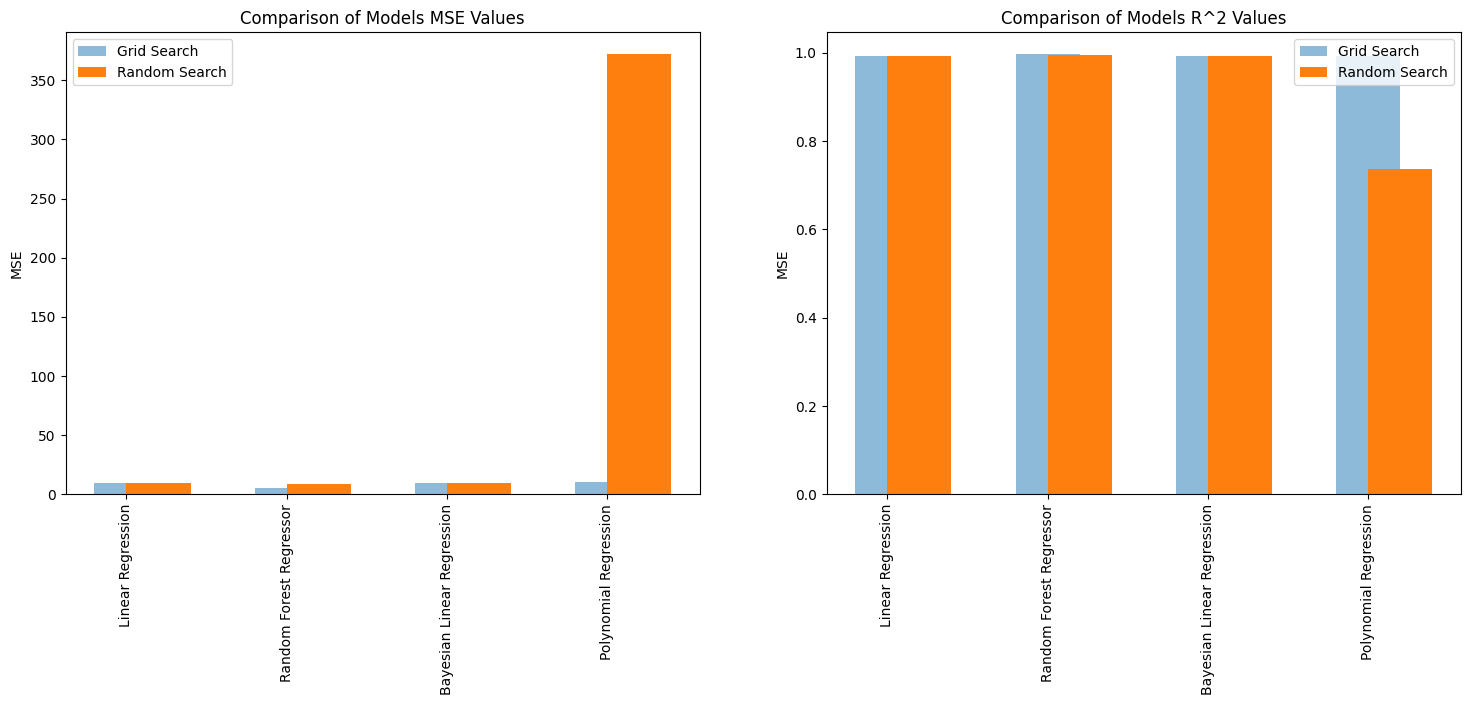

In [ ]:
# Bar plot of MSE and R2 values
grid_mse_vals = [linear_grid_test_mse, 
                  randforest_grid_test_mse, 
                  bayes_grid_test_mse, 
                  poly_grid_test_mse] # Replace with your MSE values
random_mse_vals = [linear__random_test_mse, 
                   randforest__random_test_mse, 
                  bayes__random_test_mse, 
                  poly__random_test_mse] # Replace with your MSE values
grid_r2_vals = [linear_grid_test_r2, 
                randforest_grid_test_r2,
                bayes_grid_test_r2, 
                poly_grid_test_r2] # Replace with your R2 values
random_r2_vals = [linear_random_test_r2, 
                  randforest_random_test_r2, 
                  bayes_random_test_r2, 
                  poly_random_test_r2] # Replace with your R2 values


model_names = ['Linear Regression', 'Random Forest Regressor', 'Bayesian Linear Regression', 'Polynomial Regression'] # Replace with your model names
x_pos = np.arange(len(model_names))

figure, axis = plt.subplots(1, 2,figsize=(18, 6))

axis[0].bar(x_pos, grid_mse_vals,width=0.4,label="Grid Search",alpha=0.5)
axis[0].bar(x_pos, random_mse_vals, align='edge',width=0.4,label="Random Search")
axis[0].set_xticks(x_pos, model_names,rotation=90)
axis[0].set_ylabel('MSE')
axis[0].legend()
axis[0].set_title('Comparison of Models MSE Values')

axis[1].bar(x_pos, grid_r2_vals,width=0.4,label="Grid Search",alpha=0.5)
axis[1].bar(x_pos, random_r2_vals, align='edge',width=0.4,label="Random Search")
axis[1].set_xticks(x_pos, model_names,rotation=90)
axis[1].set_ylabel('MSE')
axis[1].legend()
axis[1].set_title('Comparison of Models R^2 Values')
plt.xticks(rotation = 90)
plt.show()